<a href="https://colab.research.google.com/github/akarshsnair/House_price_prediction/blob/main/HOUSE_PRICE_PREDICTION_MATAHS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Get the data


In [ ]:
# reading data from the file
url="https://raw.githubusercontent.com/akarshsnair/House_price_prediction/main/USA_Housing.csv"
df=pd.read_csv(url)


#Information about the data

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
# return all the columns with null values count
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
# return the size of dataset
df.shape

(5000, 7)

In [ ]:
# describe the dataset
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
# get the name of column
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

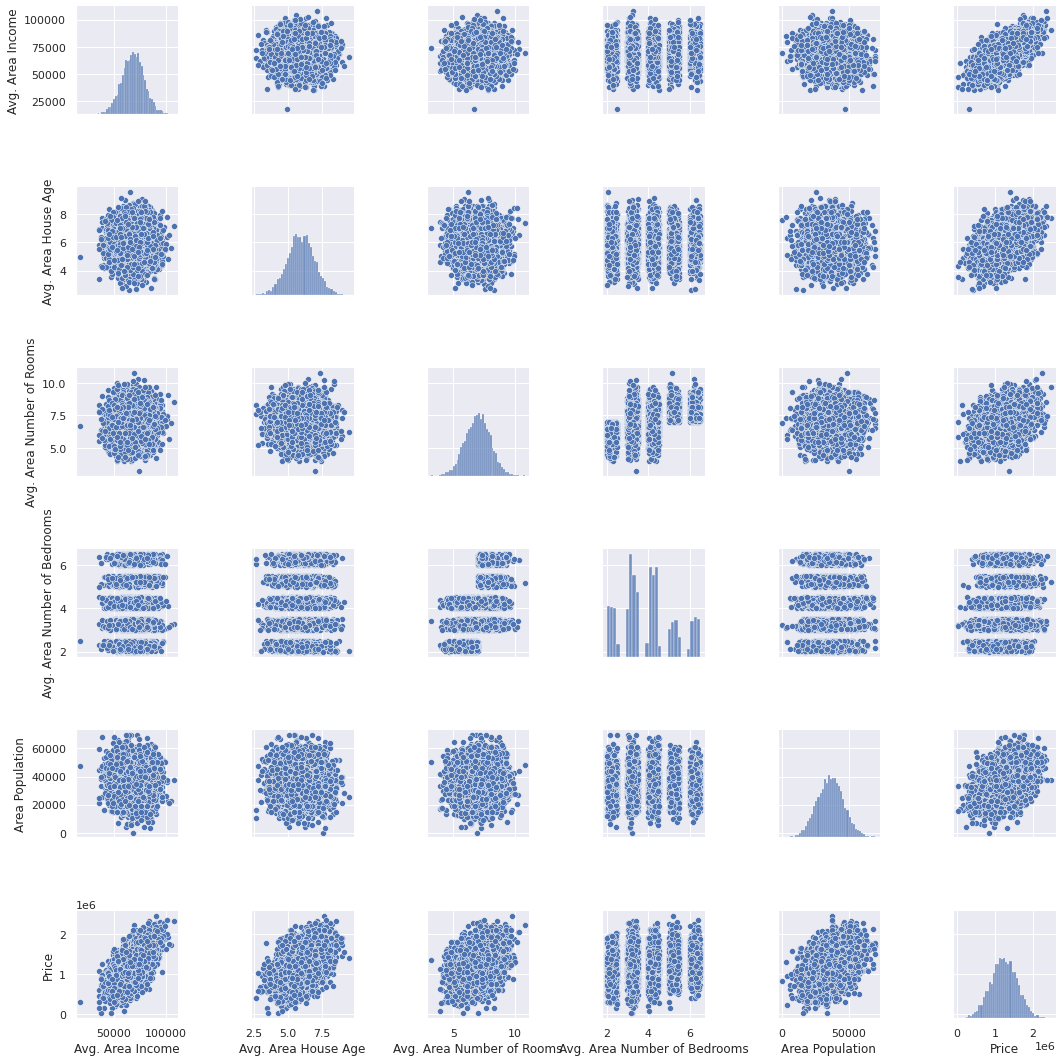

In [ ]:
#Exploratory Data Analysis for House Price Prediction
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


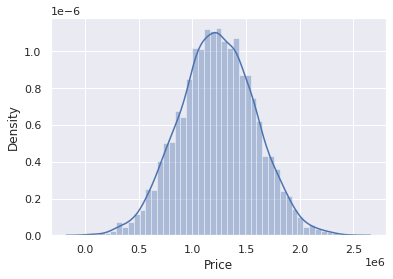

In [ ]:
#plot for the price
#To see how the price is distributed along the dataset
sns.distplot(df['Price'])

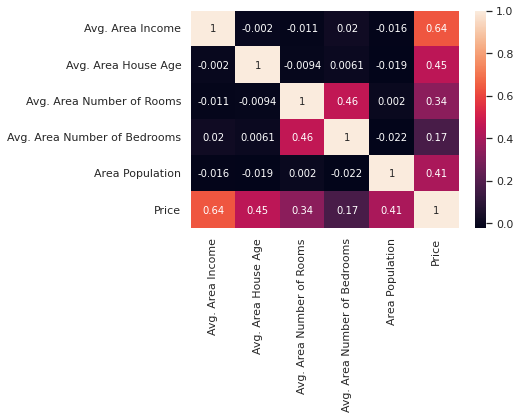

In [ ]:
#making a heatmap for the correlation of dataset
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Training a Linear Regression Model

In [ ]:
#Predicting Features
#X List
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [ ]:
#Y List
#response feature
y = df['Price']

In [ ]:
#Split Data into Train, Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
#Creating and Training the LinearRegression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
#LinearRegression Model Evaluation
#Intercept for our predictions
print(lm.intercept_)

-2640159.7968526958


In [ ]:
#Coefficient for our predictions
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
#Joining the coefficient with its features
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['coeff'])
cdf

,coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
#predicting the models for test dataset
predictions = lm.predict(X_test)

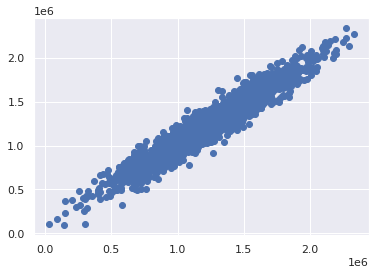

In [ ]:
#Plotting the predictions
plt.scatter(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


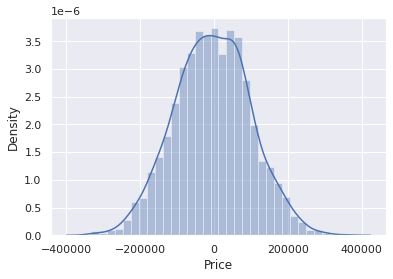

In [ ]:
#Residuals
sns.distplot((y_test-predictions))

In [ ]:
from sklearn.metrics import *
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MSE: 10460958907.208977
MAE: 82288.22251914942
RMSE: 102278.82922290897


In [ ]:
print('Accuaracy:',r2_score(y_test, predictions))
Accuracy=[]

Accuaracy: 0.9176824009649241


#Prediction of House Price based on Avg. Area Income


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
X = df[['Avg. Area Income']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print(lm.coef_)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Accuracy.append(r2_score(y_test, predictions)*100)
print('Accuaracy:',r2_score(y_test, predictions)*100)


[21.02719844]
MSE: 73727682715.874
MAE: 217170.5274585681
RMSE: 271528.41972043
Accuaracy: 41.983465594074666


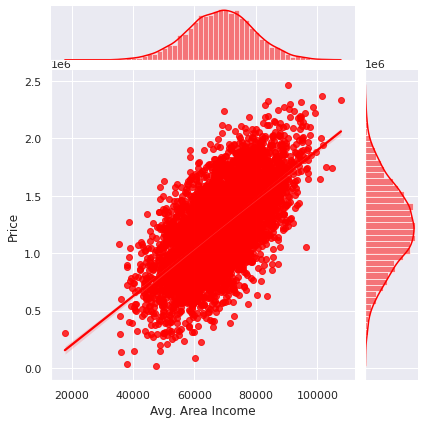

In [ ]:
sns.jointplot(x='Avg. Area Income',y="Price",data=df,kind="reg",color="red");

#Prediction of House Price based on Avg. Area House Age

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
X = df[['Avg. Area House Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print(lm.coef_)

#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)

[163286.29539338]
MSE: 101283502165.68831
MAE: 254773.46835667192
RMSE: 318250.69075445586
Accuaracy: 20.29970871601656


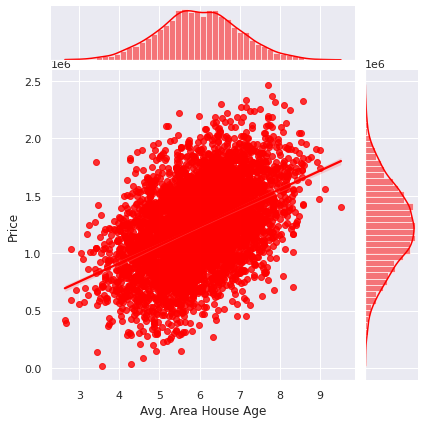

In [ ]:
sns.jointplot(x='Avg. Area House Age',y="Price",data=df,kind="reg",color="red");

##Prediction of House Price based on Avg. Area Number of Rooms

MSE: 112986824904.71535
MAE: 266659.4702288811
RMSE: 336135.1289358423
Accuaracy: 11.090328991320286


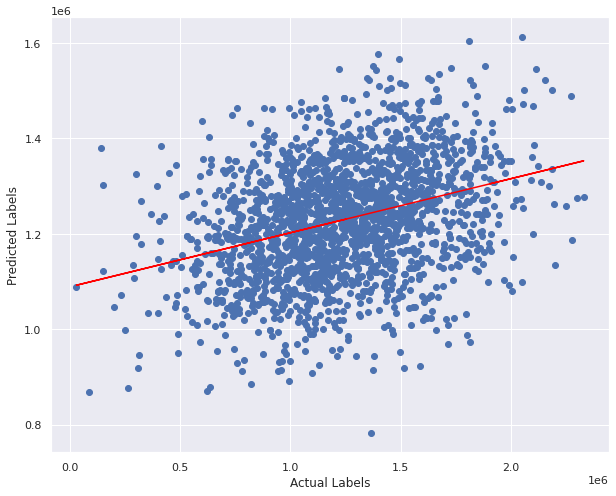

In [ ]:

#'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
     #  'Avg. Area Number of Bedrooms', 'Area Population'
X = df[['Avg. Area Number of Rooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

##Prediction of House Price based on Avg. Area Number of BedRooms


MSE: 123029978141.4039
MAE: 280018.15310426796
RMSE: 350756.2945143022
Accuaracy: 3.1873416216267825


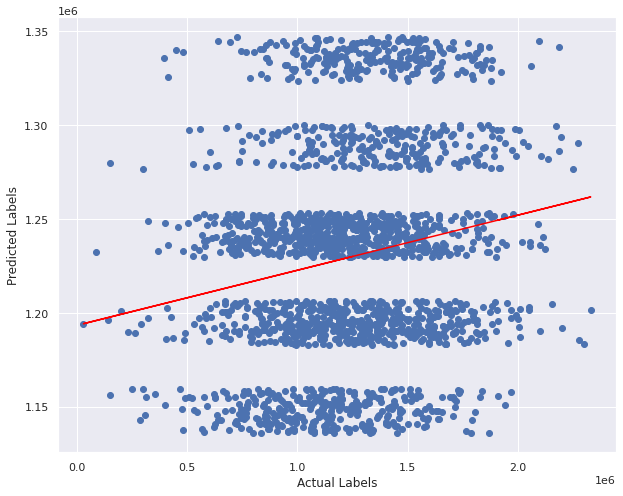

In [ ]:
from sklearn.pipeline import make_pipeline
X = df[['Avg. Area Number of Bedrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Prediction of House Price based on Area Population

MSE: 106670239812.20892
MAE: 261509.89496165712
RMSE: 326604.10256487736
Accuaracy: 15.983234588698558


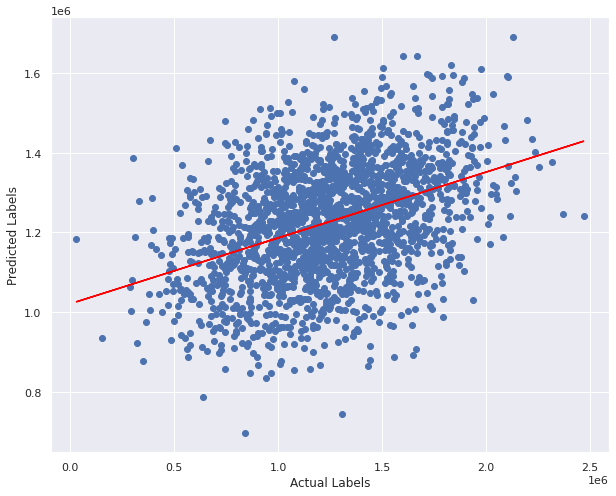

In [ ]:
X = df[['Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
Accuracy.append(r2_score(y_test, predictions)*100)
print('Accuaracy:',r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Prediction of House Price based on Avg. Area Income and Avg. Area House Age


MSE: 47127723506.06781
MAE: 172548.73873406454
RMSE: 217089.206332484
Accuaracy: 62.91505318566004


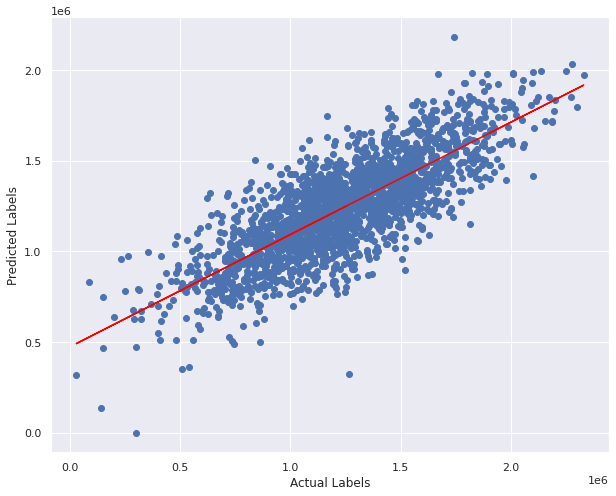

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area House Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)

plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Prediction of House Price based on Avg. Area Income and Avg. Area Number of Rooms


MSE: 60007208781.58539
MAE: 195827.56171990032
RMSE: 244963.68870015285
Accuaracy: 52.78014763739718


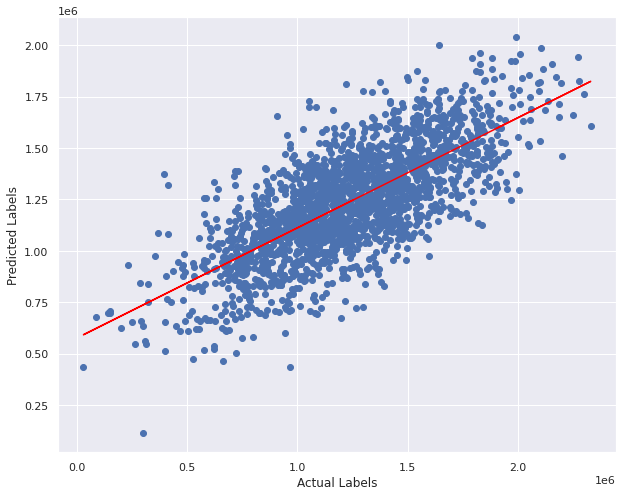

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area Number of Rooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
Accuracy.append(r2_score(y_test, predictions)*100)
print('Accuaracy:',r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Prediction of House Price based on Area population and Avg. Area Number of Rooms


MSE: 92894358391.66727
MAE: 240735.9796764639
RMSE: 304785.75818378926
Accuaracy: 26.901151084378906


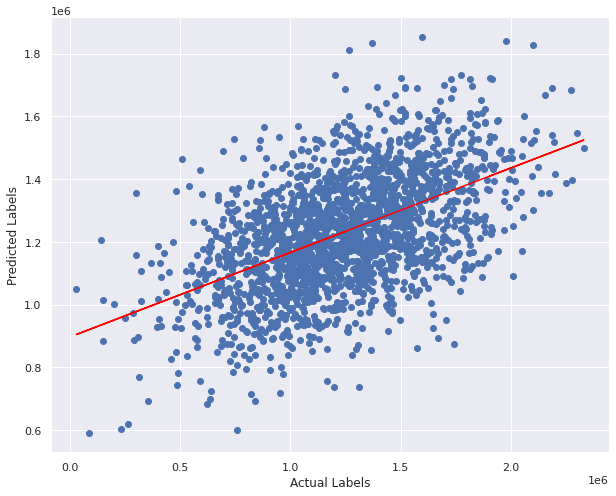

In [ ]:
X = df[['Avg. Area Number of Rooms', 'Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Prediction of House Price based on Area population and Avg. Area Income

MSE: 53427972732.1172
MAE: 184441.03766007978
RMSE: 231144.91716695222
Accuaracy: 57.957368195103555


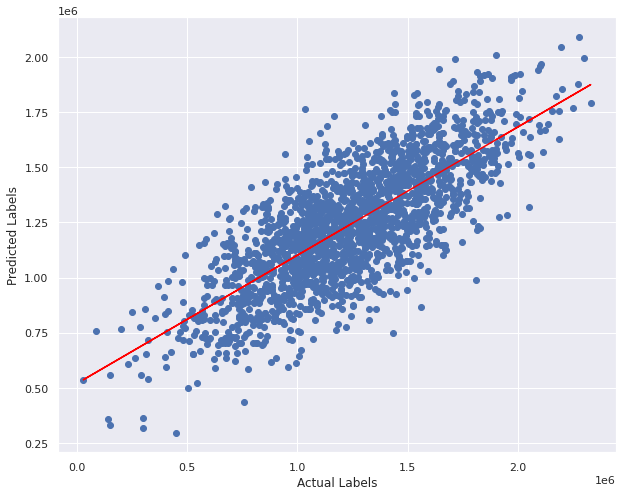

In [ ]:
X = df[['Avg. Area Income', 'Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Prediction of House Price based on Avg. Area Income  ,  Avg. Area Number of Rooms and Area population


MSE: 39129069872.215034
MAE: 158284.1101037989
RMSE: 197810.69200681502
Accuaracy: 69.20921769287554


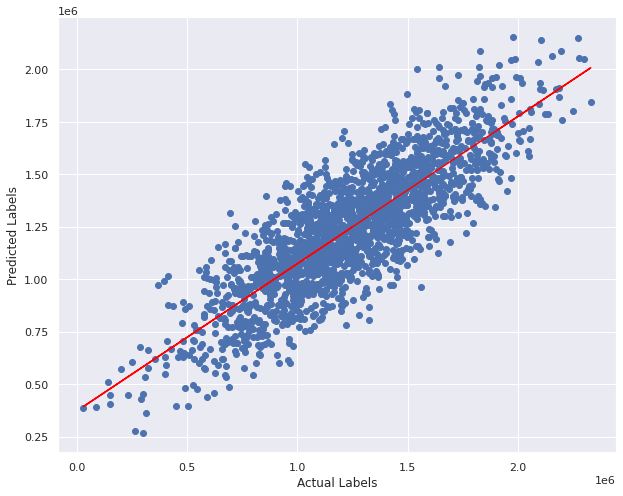

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area Number of Rooms' ,'Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


#Prediction of House Price based on Avg. Area Income  , Avg. Area House Age ,  Avg. Area Number of Rooms 


MSE: 33057956205.59746
MAE: 145660.056945266
RMSE: 181818.4704742548
Accuaracy: 73.9865952252602


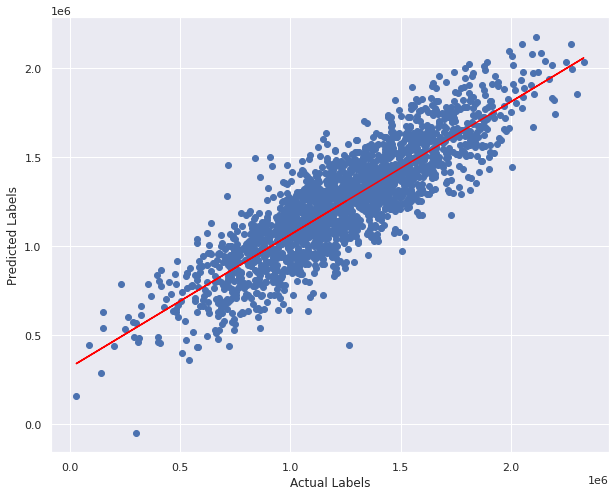

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area Number of Rooms' ,'Avg. Area House Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print('Accuaracy:',r2_score(y_test, predictions)*100)
Accuracy.append(r2_score(y_test, predictions)*100)

plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


#Prediction of House Price based on Avg. Area Income  , Avg. Area House Age ,Avg. Area Number of Rooms and Area Population


[1261202.46176908  823129.75654878 1745580.96172428 ...  374564.28251399
 1365425.74223728 1915510.83766851]
MSE: 10459278321.469332
MAE: 82248.33498864669
RMSE: 102270.61318614127
Accuaracy: 91.76956255444571


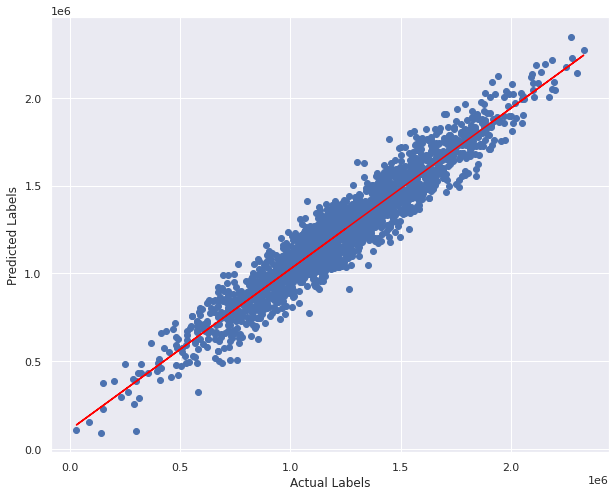

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area Number of Rooms' ,'Area Population','Avg. Area House Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#Mean squared error
print('MSE:', mean_squared_error(y_test, predictions))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
Accuracy.append(r2_score(y_test, predictions)*100)

print('Accuaracy:',r2_score(y_test, predictions)*100)
# Plot predicted vs actual
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Ridge Regression


MSE: 10459381769.466032
RMSE: 102271.11894110689
R2: 0.9176948115090721


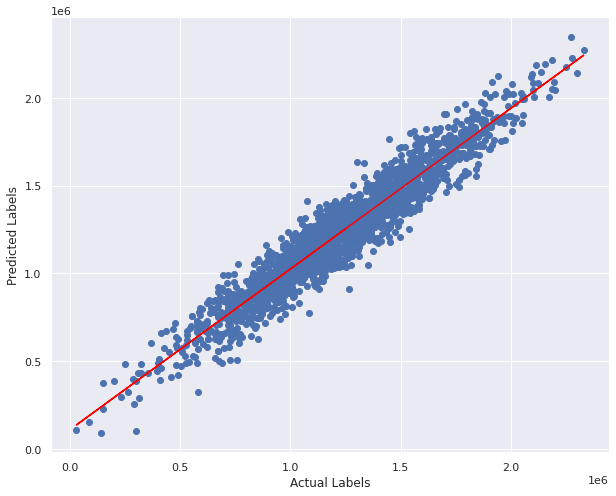

In [ ]:
# Fit a ridge model on the training set
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

model = Ridge(alpha=1)
scaler = StandardScaler()
pipe = make_pipeline(scaler,model)
pipe = pipe.fit(X_train,y_train)

# Predict on test set
predictions = pipe.predict(X_test)

# Evaluate the model using the test data
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
Accuracy.append(r2_score(y_test, predictions)*100)

# Plot predicted vs actual
plt.subplots(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

#Polynomial regression degree 3


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X = poly_reg.fit_transform(X)
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
#split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#ols
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


#predicting the value
y_pred = lin_reg.predict(X_test)
#r2 result
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

#Mean squared error
print('MSE:', mean_squared_error(y_test, y_pred))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, y_pred))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuaracy:',r2_score(y_test, y_pred)*100)
Accuracy.append(r2_score(y_test, y_pred)*100)

MSE: 10649470209.832792
MAE: 83146.71218682341
RMSE: 103196.27032908113
Accuaracy: 91.38384159252797


#Polynomial regression degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X = poly_reg.fit_transform(X)
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
#split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#ols
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


#predicting the value
y_pred = lin_reg.predict(X_test)
#r2 result
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

#Mean squared error
print('MSE:', mean_squared_error(y_test, y_pred))

#Mean absolute error
print('MAE:', mean_absolute_error(y_test, y_pred))

#Root mean squared error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuaracy:',r2_score(y_test, y_pred)*100)
Accuracy.append(r2_score(y_test, y_pred)*100)

MSE: 13964470803.724195
MAE: 87450.04776300669
RMSE: 118171.36202872588
Accuaracy: 88.7017766939887


In [ ]:
print(len(Accuracy))

15


Best Model: 12
Accuracy: 91.76956255444571


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


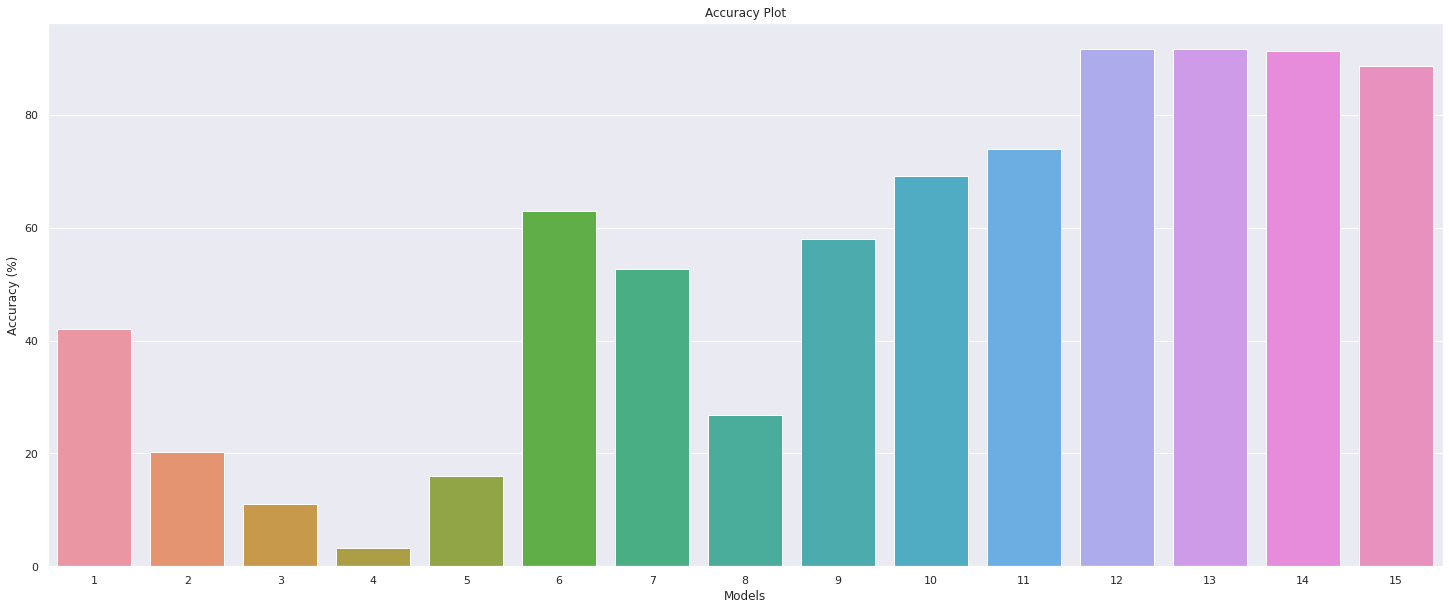

In [ ]:
sns.set(rc = {'figure.figsize': (25, 10)})
sns.set_style('ticks')
sns.set(font_scale = 1)
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','14','15']
y = Accuracy
for i in range(len(x)):
  if y[i] == max(y):
    print(f'Best Model: {x[i]}\nAccuracy: {y[i]}')
bar_plot = sns.barplot(x, y)
bar_plot.set_xlabel('Models')
bar_plot.set_ylabel('Accuracy (%)')
bar_plot.set_title('Accuracy Plot')
plt.show()